In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
%matplotlib inline

In [2]:
currency_pair = 'USDT_BTC'

In [3]:
folder = '../../data/'
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(folder)) for f in fn]
datafiles = sorted([f for f in files if f.endswith('.log.gz')])
print("Number of datafiles to extract from: {}".format(len(datafiles)))
print("First file: {}".format(datafiles[0]))
print("Last file : {}".format(datafiles[-1]))

Number of datafiles to extract from: 102475
First file: ../../data/2016-11-08/poloniex_full_2016-11-08T10:00:09.955811.log.gz
Last file : ../../data/2017-01-18/poloniex_full_2017-01-18T15:03:05.233884.log.gz


In [8]:
from helper.manage_orderbooks_v2 import extract_orderbooks_for_one_currencypair, load_orderbook_snapshot
from helper.orderbook_container import OrderbookContainer

In [5]:
filename = 'test'
query_idx = range(0,3)
data = [datafiles[idx] for idx in query_idx]
currency_pair='USDT_BTC'
range_factor = 1.05

extract_orderbooks_for_one_currencypair(data, currency_pair, outfile=filename, overwrite=True,
                                        range_factor=range_factor, pricelevel_precision=2)

data = load_orderbook_snapshot(filename, last_line=2)

ob = data[0]
print("Type: ", type(ob.asks))


  0%|          | 0/3 [00:00<?, ?it/s]

Orderbook content will be written to 'test'


100%|██████████| 2/2 [00:00<00:00, 19.25it/s]

Successfully created file 'test'
Loaded 2 orderbooks from file 'test'.
('Type: ', <class 'pandas.core.frame.DataFrame'>)


In [6]:
orderbook = data[0]

display(orderbook.bids.head())
display(orderbook.bids.shape)
display(orderbook.asks.head())
display(orderbook.asks.shape)
display(orderbook.timestamp)

,Amount
705.00,0.158232
703.70,0.001250
703.50,1.461657
703.36,1.700000
702.98,0.913410


(219, 1)

,Amount
705.45,2.772181
706.17,0.052838
706.19,0.645323
706.89,0.105160
707.18,7.988556


(239, 1)

u'2016-11-08T10:00'

705.45
705.0
705.224976072


,Amount,Type
703.500000,1.461657,bid
703.700000,0.001250,bid
705.000000,0.158232,bid
705.224976,NaN,center
705.450000,2.772181,ask
706.170000,0.052838,ask
706.190000,0.645323,ask


enrich


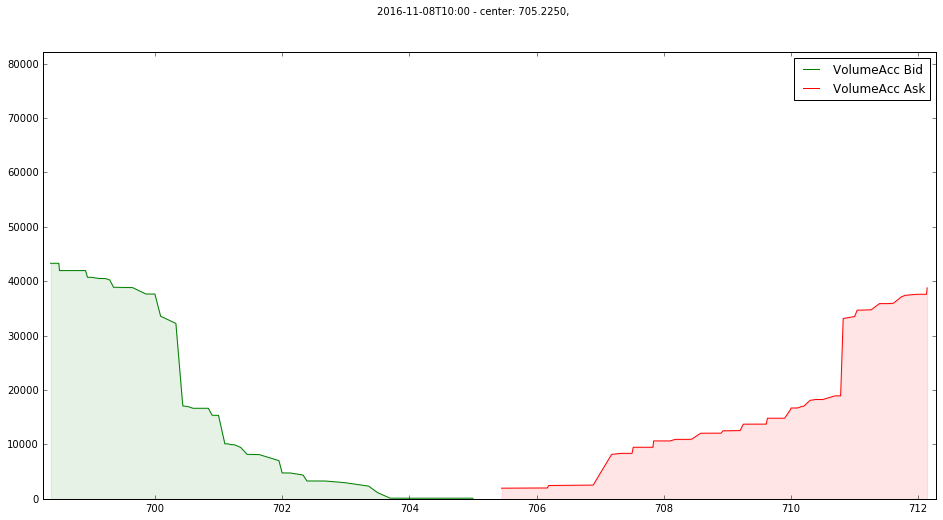

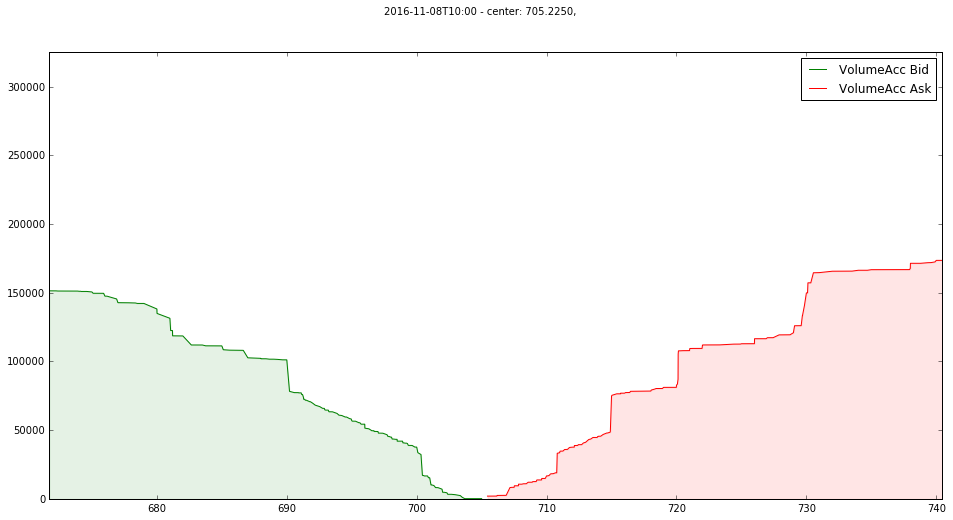

In [7]:
orderbook = data[0]
print(orderbook.get_ask())
print(orderbook.get_bid())
print(orderbook.get_center())

# orderbook.enrich()
display(orderbook.to_DataFrame(depth=3, range_factor=1.04))
orderbook.plot(range_factor=1.01)
orderbook.plot()
# orderbook.plot()